In [39]:
from IPython.display import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

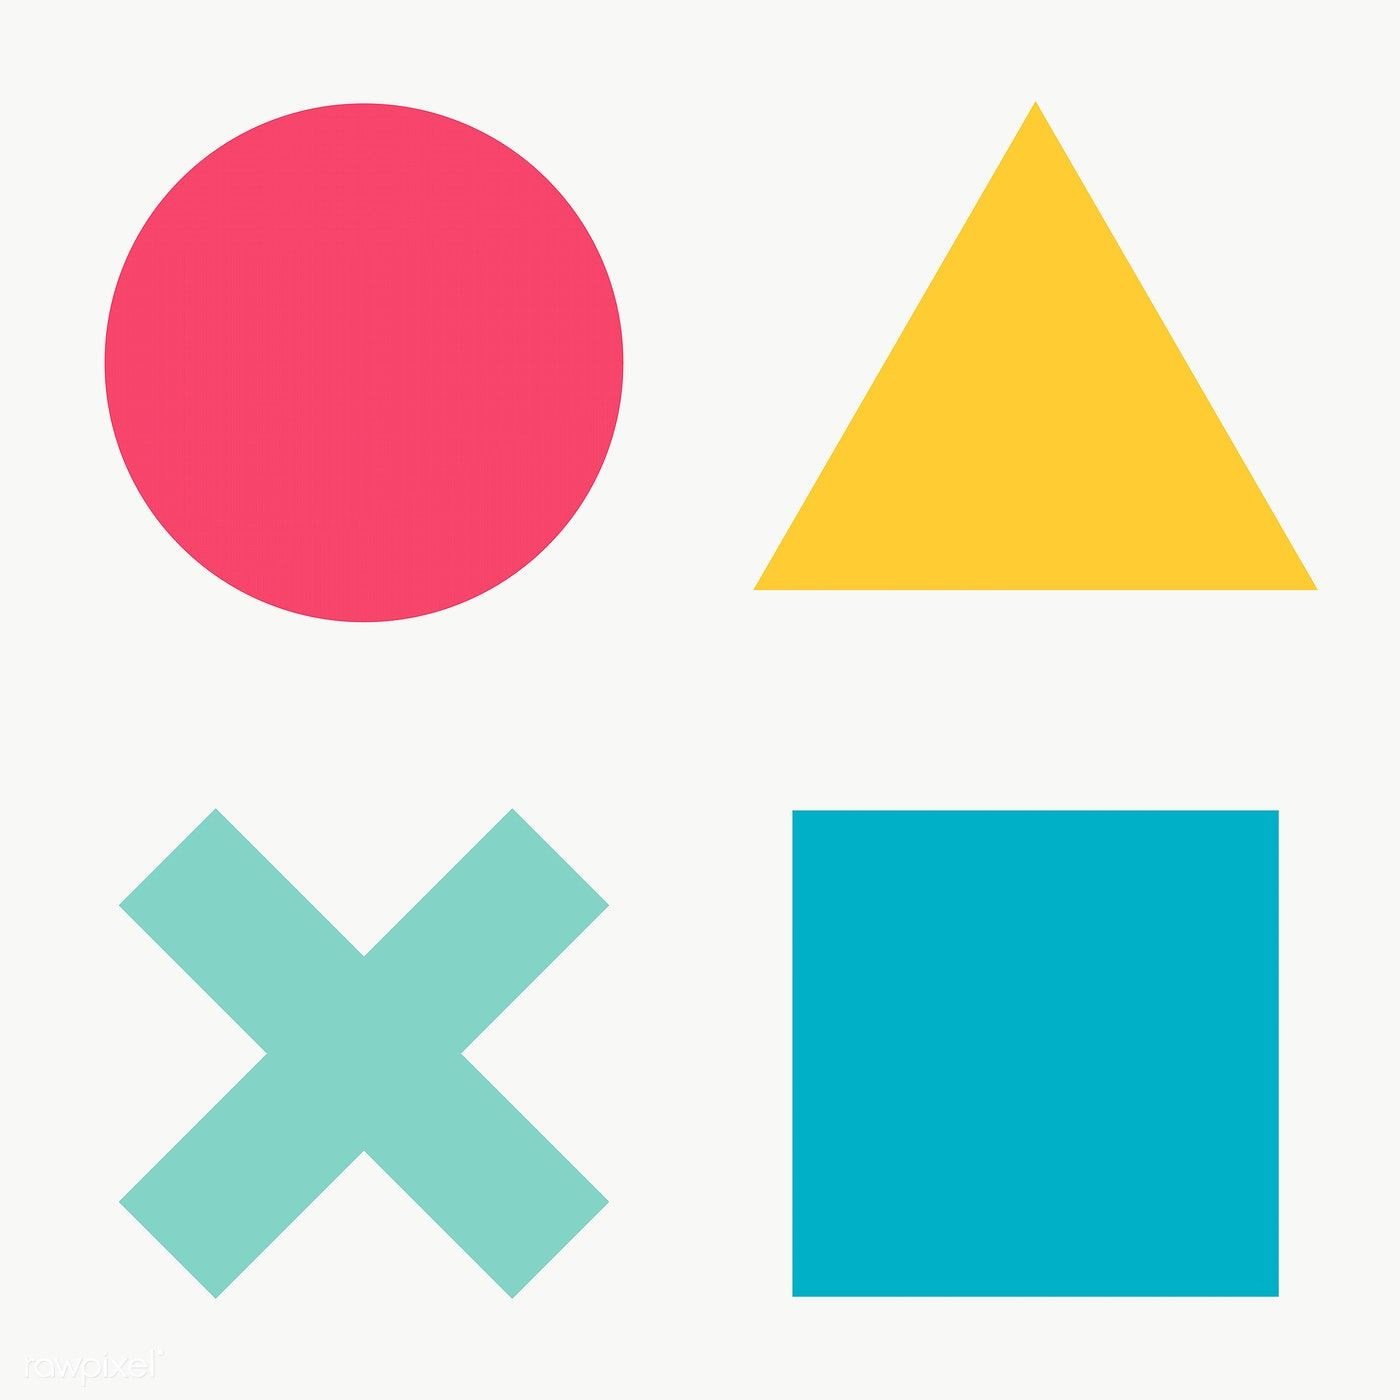

In [40]:
Image('shape.jpeg', width=400)

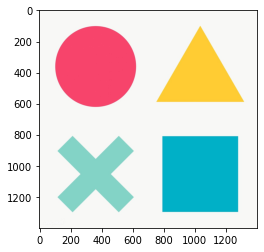

In [41]:
image = cv2.imread('shape.jpeg')
plt.imshow(image[:,:,::-1])

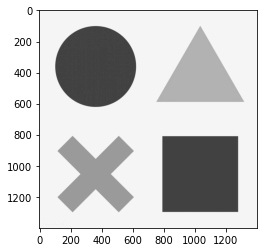

In [42]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

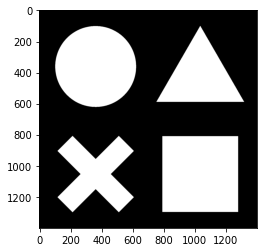

In [43]:
ret, thresh = cv2.threshold(gray_image, 220, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

In [44]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [45]:
len(contours)

5

In [46]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [-1,  3, -1, -1]]], dtype=int32)

In [47]:
color_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

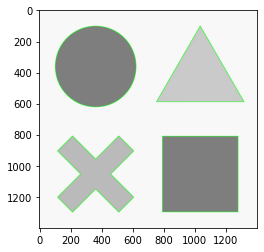

In [48]:
img_copy = color_image.copy()
cv2.drawContours(img_copy, contours, -1, (0,255,0), 2)
plt.imshow(img_copy)

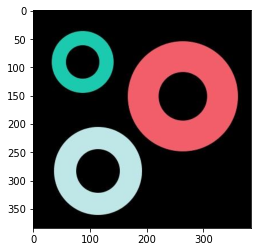

In [49]:
image2 = cv2.imread('shape2.jpeg')
plt.imshow(image2[:,:,::-1])

In [50]:
image2.shape

(384, 384, 3)

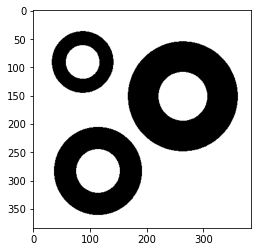

In [51]:
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
ret2, thresh2 = cv2.threshold(gray_image2, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh2)

In [52]:
contours2, hierarchy2 = cv2.findContours(thresh2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
len(contours2)

7

In [34]:
color_image2 = cv2.cvtColor(gray_image2, cv2.COLOR_GRAY2BGR)

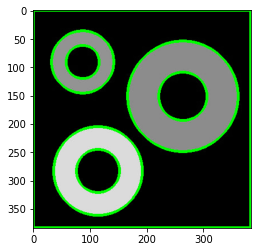

In [35]:
img_copy2 = color_image2.copy()
cv2.drawContours(img_copy2, contours2, -1, (0,255,0), 3)
plt.imshow(img_copy2)

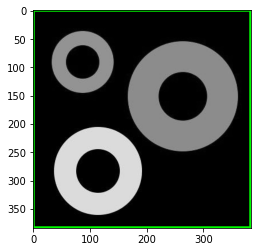

In [36]:
contours3, hierarchy3 = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
img_copy3 = color_image2.copy()
cv2.drawContours(img_copy3, contours3, -1, (0,255,0), 3)
plt.imshow(img_copy3)

In [37]:
def convert_color(hsv):
    """Utility to convert a single hsv color tuple into bgr"""
    pixel_img = np.uint8([[hsv]])
    return tuple(int(i) for i in cv2.cvtColor(pixel_img, cv2.COLOR_HSV2BGR).flatten())

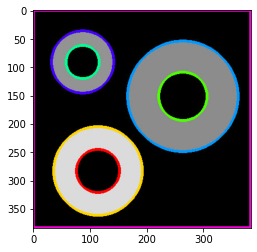

In [38]:
imageCopy4 = color_image2.copy()

for i, single_contour in enumerate(contours2):
    hsv = (int(i/len(contours2) * 180), 255, 255)
    color = convert_color(hsv)
    cv2.drawContours(imageCopy4, contours2, i, color, 3)
    plt.imshow(imageCopy4[:,:,::-1]);

In [54]:
cv2.imwrite('result.jpeg',imageCopy4)

True

# Shape Analysis


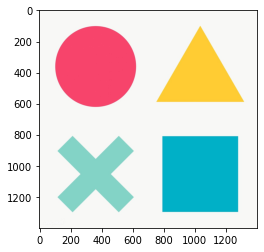

In [56]:
image = cv2.imread('shape.jpeg')
plt.imshow(image[:,:,::-1])
plt.show()

In [134]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_image, 220, 250, cv2.THRESH_BINARY_INV)

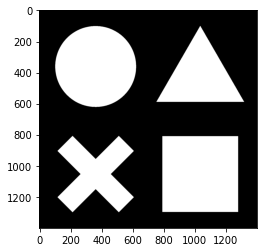

In [135]:
plt.imshow(thresh)

In [136]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [137]:
# Create a copy of the original image.
imageCopy_1 = gray_image.copy()
imageCopy_1 = cv2.cvtColor(imageCopy_1, cv2.COLOR_GRAY2BGR)

# Draw all the contours.
ret = cv2.drawContours(imageCopy_1, contours, -1, (0,0,255), 3)

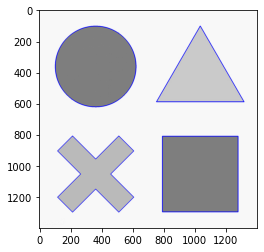

In [138]:
plt.imshow(imageCopy_1)

In [139]:
contours = np.delete(contours, 2)

/Users/chinmay/miniconda3/lib/python3.9/site-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [140]:
for contour in contours[:4]:
    M = cv2.moments(contour)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))
    
    cv2.circle(imageCopy_1, (x, y), 10, (255,0,0), -1)

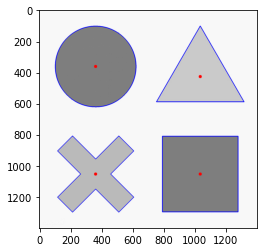

In [141]:
plt.imshow(imageCopy_1)
plt.show()

In [142]:
for index, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    parimeter = cv2.arcLength(contour, True)
    print('{}. Area : {}, perimeter : {}'.format(index, area, parimeter))

0. Area : 236196.0, perimeter : 1944.0
1. Area : 133262.0, perimeter : 2224.6584059000015
2. Area : 211358.0, perimeter : 1723.8418307304382
3. Area : 137161.5, perimeter : 1770.2022215127945


## Bounding box

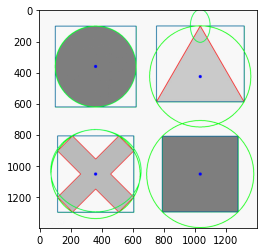

In [143]:
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(imageCopy_1, (x,y), (x+w, y+h), (0,255,0), 4)
    
    box = cv2.minAreaRect(contour)
    boxpoints = np.int0(cv2.boxPoints(box)) 
    cv2.drawContours(imageCopy_1, [boxpoints], -1, (150,100,0), 4)
    
    ((x,y), radius) = cv2.minEnclosingCircle(contour)
    cv2.circle(imageCopy_1, (int(x),int(y)), int(round(radius)), (0,255,0), 4)
    
    if len(contour)< 5:
        continue
    ellipse = cv2.fitEllipse(contour)
    cv2.ellipse(imageCopy_1, ellipse, (50,255,0), 4)

plt.imshow(imageCopy_1[:,:,::-1])